# 

# Logic and Loops

Now that we have seen a lot of the functionality of R, we will start to
build up more structured code using programming structures. To start, we
will introduce what are called *control flows*. Control flows are code
blocks that determine a sequence of code to be run. The two types of
control flows we will introduce are if-else blocks and loops.

In [ ]:
library(HDSinRdata)
library(tidyverse)

## Logic and Conditional Expressions

You may recall that we introduced logical operators in
**?@sec-data-files**. We used these operators through conditional
expressions such as when we indexed a data frame or the `ifelse()` or
`casewhen()` functions. For example, below we have vectors of systolic
and diastolic blood pressure measurements and we write a logical
operator to check if at least one of the systolic measurements is above
140 or if at least one of the diastolic measurements is above 90.

In [ ]:
sbp_measurements <- c(131, 110, 125, 145, NA, 130)
dbp_measurements <- c(70, NA, 80)
any(sbp_measurements > 140, na.rm=TRUE) | 
  any(dbp_measurements > 90, na.rm=TRUE)

[1] TRUE

Let’s do another example. Suppose that these blood pressure measurements
were taken consecutively but may have missing values. We want to create
a single value to summarize the blood pressure for the patient. If we
only have one blood pressure reading, then we will use that value.
However, if there is more than one blood pressure reading, then we drop
the first observation and average the rest. We will assume that not all
values are NA. The code below uses an `ifelse()` function to do this by
first checking if there is a single reading. If so, it takes the sum
removing NA values to find that value. If not, we find all non-NA values
and remove the first one before averaging.

In [ ]:
sbp_measurements <- c(131, 110, 125, 145, NA, 130)
ifelse(sum(!is.na(sbp_measurements)) == 1, 
       sum(sbp_measurements, na.rm=TRUE),
       mean(sbp_measurements[!is.na(sbp_measurements)][-1]))

[1] 127.5

We could also accomplish the same thing using a *control flow* called an
*if-else statement*. An if-else statement follows the structure below.
First, we have a conditional statement. If the conditional statement is
true, then the code in the if statement, the code within the first set
of parentheses, is run. If not, then the code in the else statement is
run. In this way, the control flow controls how our code is executed.

    if (conditional statement){
    block of code if the statement is TRUE
    } else{
    block of code if the statement is FALSE
    }

Below, is an example where the conditional statement is the same as
above. Note that since either the code in the if or else statement is
run, the object `avg_val` is always defined.

In [ ]:
sbp_measurements <- c(131, 110, 125, 145, NA, 130)
if(sum(!is.na(sbp_measurements))==1){
  avg_val <- sum(sbp_measurements, na.rm=TRUE)
} else{
  avg_val <- mean(sbp_measurements[!is.na(sbp_measurements)][-1])
}
avg_val

[1] 127.5

One of the things to notice is that an `if` statement can only take in a
*single* Boolean. It cannot take in a vector of Boolean values like the
`ifelse()` and `case_when()` functions can. In that way, the `ifelse()`
function is useful because it can be applied to multiple instances, but
it isn’t as flexible if you want to run multiple lines of code depending
on the logical statement since it doesn’t allow you to include a code
block.

Let’s do another example of both an if-else statement and the `ifelse()`
function to demonstrate this. Below, we use an if-else statement to
determine if someone has hypertension. Note that here we have two lines
of code that are run in each part - one line printing the result and the
other is storing a 0/1 value. Try changing the values of `sbp` and
`dbp`.

In [ ]:
sbp <- 130
dbp <- 80
if(sbp > 140 | dbp > 90){
  print("Hypertension")
  hyp <- 1
} else{
  print("No Hypertension")
  hyp <- 0
}

[1] "No Hypertension"

[1] 0

Now let’s replicate this with the `ifelse()` function which will allow
us to take in paired vectors of blood pressure measurements and return a
vector of 0/1 values for each observation. The difference here is that
we cannot include a print statement since we are only allowed one return
value.

In [ ]:
sbp_measurements <- c(131, 110, 125, 145, 130)
dbp_measurements <- c(90, 75, 80, 90, 80)
hyp <- ifelse(sbp_measurements > 140 | dbp_measurements > 90, 1, 0)
hyp

[1] 0 0 0 1 0

Note that above we ignored NA values. In this case, changing `sbp` or
`dbp` to NA will cause an error in the if-else statement. This is
because it will not understand which code block to run. The `ifelse()`
can handle NA values and will return NA for observations with no
TRUE/FALSE value. To accomplish this with the if-else statement, we can
add in multiple conditions. In particular, we can add in more statements
as below. In this case, the first time we reach a true conditional
statement, we run the code in that block. If no statements are true,
then we run the last block of code. So we always run exactly one block
of code.

    if (conditional statement A){
    block of code if the statement A is TRUE
    } else if (conditional statement B){
    block of code if the statement B is TRUE and statement A is FALSE
    } else if (conditional statement C){
    block of code if the statement C is TRUE and statement A and B are FALSE
    } else{
    block of code if statements A, B, and C are all FALSE
    }

Let’s use this with our hypertension example. In this case, we want to
return NA if the answer is not known. Change the values so that you
reach each code block. The order of the conditions matters because if
the first statement is false, then we know at least one value is not NA.
This also means that we would only check the fourth condition if the
first three are false, which means that neither of the values can be NA.

In [ ]:
sbp <- 130
dbp <- 80
if(is.na(sbp) & is.na(dbp)){
  # Both are NA
  hyp <- NA
} else if ((is.na(sbp) & dbp <= 90) | (is.na(dbp) & sbp <= 140)){
  # One is NA and the other is below the threshold
  hyp <- "Inconclusive"
} else if ((is.na(sbp) & dbp > 90) | (is.na(dbp) & sbp > 140)){
  # One is NA and the other is above the threshold
  hyp <- "Hypertension"
} else if (dbp > 90 | sbp > 140){
  # Neither are NA and at least one is above the threshold
  hyp <- "Hypertension"
} else{
  # Neither are NA and neither is above the threshold
  hyp <- "No Hypertension"
}
hyp

[1] "No Hypertension"

We can actually rearrange these conditions to have one less condition.
In the order below, we first check if both are NA. Then we check that at
least one value is above the threshold. This statement uses the fact
that both can’t be NA since the first condition must be false. Next, in
the third statement, if at least one value is NA then that must mean the
other is below the threshold so the result is inconclusive.

In [ ]:
sbp <- 130
dbp <- 80
if(is.na(sbp) & is.na(dbp)){
  # Both are NA
  hyp <- NA
} else if (sum(dbp > 90, sbp > 140, na.rm=TRUE) >= 1){
  # At least one is above the threshold - sum will remove NA values
  hyp <- "Hypertension"
} else if (is.na(sbp) | is.na(dbp)){
  # Inconclusive
  hyp <- "Inconclusive"
} else{
  # Neither are NA and neither is above the threshold
  hyp <- "No Hypertension"
}
hyp

[1] "No Hypertension"

This can still seem like a lot of conditions to replicate what we did in
a single line with an `ifelse()` function. In general, we prefer a
simpler format. Consider the code below. In this case, we have two
vectors `x` and `y` that we want to plot. First, we check whether these
vectors are numeric. If not, we convert them to factors. Rather than
returning a value as we do with an `ifelse()` function, we are changing
our data depending on the type of `x` and `y`. Note that these
statements do not contain an else statement. That is because we don’t
want to run any code when the condition is false. In the video at the
end of the chapter, we will show another example of when we could not
replicate the logic of an if-else statement with a function.

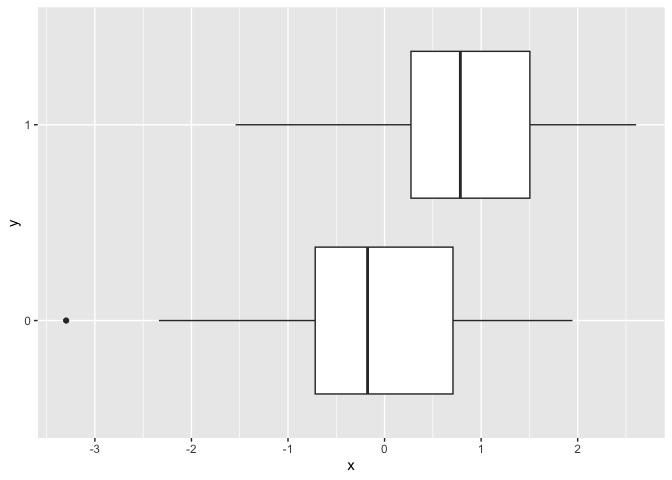

In [ ]:
# example x and y vectors
y <- factor(rbinom(100, 1, 0.3))
x <- rnorm(100, ifelse(y==0, 0, 0.75)) 
# change x to factor(rbinom(100, 1, 0.3)) to observe

# convert x and y to factors if not numeric!
if (!is.numeric(x)){ x <- as.factor(x) }
if (!is.numeric(y)){ y <- as.factor(y) }

# find type of plot
if(is.factor(x) & is.factor(y)){
  # bar plot 
  p <- ggplot()+geom_bar(aes(x=x, fill=y), position="dodge")
} else if (!is.factor(y) | !(is.factor(x))){
  # box plot when one numeric, one factor
  p <- ggplot()+geom_boxplot(aes(x=x,y=y))
} else{
  # scatter plot when both numeric
  p <- ggplot()+geom_point(aes(x=x,y=y))
}
p

### Practice Question

Use both an if-else statement and a `case_when()` function to find y as
given by the function below.
$$y = \begin{cases} 1 & x > 0 \\ 0 & x =0 \\ 0.1 & x < 0  \end{cases} $$

In [ ]:
# Insert your solution here:
x <- 2 # change x to different values to check your solution!

## Loops

Another common control flow we will use are loops. Loops capture code
chunks we want to run multiple times. For this example, we will use the
`NHANESSample` data from the **HDSinRdata** package.

In [ ]:
nhanes <- NHANESsample %>% 
  select(c(RACE, SEX, SBP1, DBP1, HYP, LEAD)) %>%
  na.omit()

In the code below, we are fitting a simple linear regression model for
systolic blood pressure with the single covariate of blood lead level
for each race group and storing the associated coefficients and
p-values. This code is repetitive since we repeat the same steps for
each group and the only element that is changing is the race group. This
makes our code cluttered but also means we are prone to introducing
errors. In fact, you can see that we have the wrong coefficient and
p-value for the fourth model.

In [ ]:
dat1 <- nhanes[nhanes$RACE == "Mexican American", ]
mod1 <- summary(lm(SBP1 ~ LEAD, data = dat1))
coef1 <- mod1$coefficients[2,1]
pval1 <- mod1$coefficients[2,4]

dat2 <- nhanes[nhanes$RACE == "Non-Hispanic White", ]
mod2 <- summary(lm(SBP1 ~ LEAD, data = dat2))
coef2 <- mod2$coefficients[2,1]
pval2 <- mod2$coefficients[2,4]

dat3 <- nhanes[nhanes$RACE == "Non-Hispanic Black", ]
mod3 <- summary(lm(SBP1 ~ LEAD, data = dat3))
coef3 <- mod3$coefficients[2,1]
pval3 <- mod3$coefficients[2,4]

dat4 <- nhanes[nhanes$RACE == "Other Hispanic", ]
mod4 <- summary(lm(SBP1 ~ LEAD, data = dat4))
coef4 <- mod3$coefficients[2,1]
pval4 <- mod3$coefficients[2,4]

dat5 <- nhanes[nhanes$RACE == "Other Race", ]
mod5 <- summary(lm(SBP1 ~ LEAD, data = dat5))
coef5 <- mod5$coefficients[2,1]
pval5 <- mod5$coefficients[2,4]

data.frame(
  group = c("Mexican American", "Non-Hispanic White", 
            "Non-Hispanic Black", "Other Hispanic", "Other Race"),
  coefs = c(coef1, coef2, coef3, coef4, coef5),
  pvals = c(pval1, pval2, pval3, pval4, pval5))

               group     coefs         pvals
1   Mexican American 0.7829969  3.974547e-11
2 Non-Hispanic White 2.4995008 7.806423e-138
3 Non-Hispanic Black 2.0053638  1.828387e-51
4     Other Hispanic 2.0053638  1.828387e-51
5         Other Race 1.9269690  1.064056e-11

We can rewrite this code slightly. In this case, we create an object `i`
which will represent the index of the group. This change means that the
only thing that changes for each group is that we update the value of i.
This is much less prone to errors, but still long.

In [ ]:
# Initialize results data frame
race_values <- c("Mexican American", "Non-Hispanic White", 
            "Non-Hispanic Black", "Other Hispanic", "Other Race")
df <- data.frame(
  group = race_values,
  coefs = 0,
  pvals = 0)

i <- 1
dat <- nhanes[nhanes$RACE == df$group[i], ]
mod <- summary(lm(SBP1 ~ LEAD, data = dat))
df$coef[i] <- mod$coefficients[2,1]
df$pval[i] <- mod$coefficients[2,4]

i <- 2
dat <- nhanes[nhanes$RACE == df$group[i], ]
mod <- summary(lm(SBP1 ~ LEAD, data = dat))
df$coef[i] <- mod$coefficients[2,1]
df$pval[i] <- mod$coefficients[2,4]

i <- 3
dat <- nhanes[nhanes$RACE == df$group[i], ]
mod <- summary(lm(SBP1 ~ LEAD, data = dat))
df$coef[i] <- mod$coefficients[2,1]
df$pval[i] <- mod$coefficients[2,4]

i <- 4
dat <- nhanes[nhanes$RACE == df$group[i], ]
mod <- summary(lm(SBP1 ~ LEAD, data = dat))
df$coef[i] <- mod$coefficients[2,1]
df$pval[i] <- mod$coefficients[2,4]

i <- 5
dat <- nhanes[nhanes$RACE == df$group[i], ]
mod <- summary(lm(SBP1 ~ LEAD, data = dat))
df$coef[i] <- mod$coefficients[2,1]
df$pval[i] <- mod$coefficients[2,4]

df

               group coefs pvals      coef          pval
1   Mexican American     0     0 0.7829969  3.974547e-11
2 Non-Hispanic White     0     0 2.4995008 7.806423e-138
3 Non-Hispanic Black     0     0 2.0053638  1.828387e-51
4     Other Hispanic     0     0 1.2420963  8.457748e-09
5         Other Race     0     0 1.9269690  1.064056e-11

We will write this code as a *for loop*. A for loop contains two pieces.
First, we have an *iterator*. An iterator traverses an object that has a
natural order. Most of the time we traverse over vectors but we could
also have a list object. The second piece is a code block. This code is
run for each value of the iterator.

    for (iterator_name in object){
    code to run for each value of the iterator
    }

Two simple for loops are given below. In the first loop, our iterator
goes through the vector `1:5` whereas in the second one our iterator
iterates through the vector of names. In the first loop, we will
traverse the numbers 1 to 5 and for each number we will run the code
that squares the number. In each iteration, we name the current number
we are on to be `i`. That means that the first time through the loop `i`
is equal to 1, the second time `i` has value 2, etc. In the second loop,
our iterator is also a vector but this time it is `names`. In this case,
in each iteration the object `name` represents the current name we are
on as we traverse the vector of `names`. In particular, the first time
through the loop `name` is equal to “Alice”, the second time `name` has
value “Bob”, and so forth.

In [ ]:
for (i in 1:5){
  print(sqrt(i))
}

[1] 1
[1] 1.414214
[1] 1.732051
[1] 2
[1] 2.236068

In [ ]:
names <- c("Alice", "Bob", "Carol")
for (name in names){
  print(paste("Hello,", name))
}

[1] "Hello, Alice"
[1] "Hello, Bob"
[1] "Hello, Carol"

Let’s apply this to our example. First, we use a numeric iterator `i`
that will take on values 1 to 5. This will directly replicate our code
above in which the value of `i` changed for each race group. Our result
matches that above.

In [ ]:
df <- data.frame(group = race_values, coefs = 0, pvals = 0)

for (i in 1:5){
  dat <- nhanes[nhanes$RACE == df$group[i], ]
  mod <- summary(lm(SBP1 ~ LEAD, data = dat))
  df$coef[i] <- mod$coefficients[2,1]
  df$pval[i] <- mod$coefficients[2,4]
}
df

               group coefs pvals      coef          pval
1   Mexican American     0     0 0.7829969  3.974547e-11
2 Non-Hispanic White     0     0 2.4995008 7.806423e-138
3 Non-Hispanic Black     0     0 2.0053638  1.828387e-51
4     Other Hispanic     0     0 1.2420963  8.457748e-09
5         Other Race     0     0 1.9269690  1.064056e-11

Let’s show a different way we could write the same loop. This time we
will make our iterator be the race group name. In this case, we update
how we are storing the coefficients and p-values because we are not
iterating over an index.

In [ ]:
coefs <- c()
pvals <- c()

for (group in race_values){
  dat <- nhanes[nhanes$RACE == group, ]
  mod <- summary(lm(SBP1 ~ LEAD, data = dat))
  coefs <- c(coefs, mod$coefficients[2,1])
  pvals <- c(pvals, mod$coefficients[2,4])
}

data.frame(group = race_values, coefs = coefs, pvals = pvals)

               group     coefs         pvals
1   Mexican American 0.7829969  3.974547e-11
2 Non-Hispanic White 2.4995008 7.806423e-138
3 Non-Hispanic Black 2.0053638  1.828387e-51
4     Other Hispanic 1.2420963  8.457748e-09
5         Other Race 1.9269690  1.064056e-11

Another type of loop is a *while loop*. A while loop does not have an
iterator. Instead, a while loop checks a condition. If the condition is
true, the loop runs the code in the code block. If the condition is
false, it stops and breaks out of the loop. That is, the code is run
until the condition is no longer met.

    while (condition){
    code to run each iteration
    }

The code below gives an example of a simple while loop. In this case,
the loop keeps dividing `x` by 2 until it is below a certain value of 3.
In this case, `x` starts above 3 so the condition starts off being true
and we would divide `x` by 2 to get 50. Since 50 is still greater than
3, the code block is run again, etc. Once `x` reaches a value of 1.5625
the condition no longer holds and the code stops. Note that if the
condition was `x > -1` it would hold indefinitely, creating what is
called an infinite loop.

In [ ]:
x <- 100
while(x > 3){
  x <- x/2
}
x

[1] 1.5625

Let’s do another example with a bigger code block. The code below
creates a Poisson process of arrivals where in each iteration we
generate the next arrival time by drawing from an exponential
distribution. Once we reach the end of the time interval (i.e. the
current time is greater than 10) we stop. If we re-run this chunk of
code, we might get a different length vector.

In [ ]:
arrivals <- c()
time <- 0
next_arrival <- rexp(1, rate = 3)

# Find the time of all arrivals in the time period [0,10]
while(time+next_arrival <= 10){
  # Update list of arrivals and current time
  arrivals <- c(arrivals, next_arrival)
  time <- time + next_arrival
  
  # Generate the next arrival
  next_arrival <- rexp(1, rate = 3)
}

Given we have two types of loops, how do you know which to use? You
should use a for loop when you know how many times you will go through
the loop and/or if there is a clear object to iterate through. On the
other hand, while loops are useful if you don’t know how many times you
will go through the loop and you want to iterate through the loop
*until* something happens. Within a for loop, you can also break out
early using the `break` operator. This stops the loop similar to a while
loop but is sometimes less succinct. The code below loops through the
blood pressure measurements we defined earlier to find if any of the
observations meet the criteria for hypertension.

In [ ]:
# Start with assumption that the result is FALSE
res <- FALSE
for (i in 1:length(sbp_measurements)){
  
  # If above threshold, update the result and stop the loop
  if (sbp_measurements[i] > 140 | dbp_measurements[i] < 90){
    res <- TRUE
    break 
  }
}

### Practice Question

Use a loop to find the smallest integer number `x` such that
$2.3^x \geq 100$. The answer should be 6.

In [ ]:
# Insert your solution here:

## Avoiding Control Flows with Functions

We just introduced logic and loops and now I’m going to tell you to
avoid them when you can. What?! Yes, control flows are very useful
programming structures, but sometimes the same thing can be done without
them. For example, we can find whether there is at least one observation
that has hypertension using a single line of code.

In [ ]:
any(sbp_measurements > 140 | dbp_measurements > 90)

[1] TRUE

Another example we saw above was using an `ifelse()` or `case_when()`
function instead of an if-else statement. These two functions are
*vectorized functions*. That means that the function is evaluated on a
vector of values rather than having to loop through each value
separately. Vectorized functions return a vector or results of the same
size as your input. That means that if you needed to do a computation on
every element of a vector you could either loop through all the elements
and call that function *or* you can take advantage of the vectorized
structure and call the function on the whole vector. This is generally
cleaner and more efficient. The `any()` function up not a vectorized
function since it returns a single TRUE/FALSE value but it also helps to
make our code cleaner.

Another tool that can help with brevity in this manner is the family of
*apply functions*. These are loop-hiding functions. In
**?@sec-data-files**, we saw the `apply(X, MARGIN, FUN)` function. This
function called the function `FUN` on either the rows (`MARGIN = 1`) or
columns (`MARGIN = 2`) of `X`, which is data frame or matrix `X`. Below,
we generate a random matrix `X` and compute the column means using a
loop and using the `apply()` function. We can see that the version with
the `apply()` function is simpler.

In [ ]:
X <- matrix(rnorm(100), nrow = 20, ncol = 5)

# Apply mean function  
apply(X, 2, mean)

[1]  0.06448102  0.28227190  0.06780760 -0.03905682  0.15065828

[1]  0.06448102  0.28227190  0.06780760 -0.03905682  0.15065828

Another loop-hiding function is `lapply(X, FUN)`. This function applies
the function `X` to each element of `X`. In this case, `X` functions
like an iterator and `FUN` will be a function representing what we want
to do in each iteration. The result is returned as a list of the
function output for each value of `X`. We will use this function in the
regression context we saw earlier. Here, `X` is our vector of groups and
we have written a custom function to be able to call that code on each
group. We will learn how to write our own functions in
**?@sec-functions**.

In [ ]:
find_lm_results <- function(group){
  # Runs simple linear regression and returns coefficient and p-value
  dat <- nhanes[nhanes$RACE == group, ]
  mod <- summary(lm(SBP1 ~ LEAD, data = dat))
  return(mod$coefficients[2,c(1,4)])
}

lapply(race_values, find_lm_results)

[[1]]
    Estimate     Pr(>|t|) 
7.829969e-01 3.974547e-11 

[[2]]
     Estimate      Pr(>|t|) 
 2.499501e+00 7.806423e-138 

[[3]]
    Estimate     Pr(>|t|) 
2.005364e+00 1.828387e-51 

[[4]]
    Estimate     Pr(>|t|) 
1.242096e+00 8.457748e-09 

[[5]]
    Estimate     Pr(>|t|) 
1.926969e+00 1.064056e-11 

Another useful function is `sapply(X, FUN)`. This function works the
same as `lapply()`. However, it then tries to simplify the output to be
either a vector or matrix. You can remember the difference by
remembering the l in `lapply()` stands for list and the s in `sapply()`
stands for simplify.

In [ ]:
sapply(race_values, find_lm_results)

         Mexican American Non-Hispanic White Non-Hispanic Black Other Hispanic
Estimate     7.829969e-01       2.499501e+00       2.005364e+00   1.242096e+00
Pr(>|t|)     3.974547e-11      7.806423e-138       1.828387e-51   8.457748e-09
           Other Race
Estimate 1.926969e+00
Pr(>|t|) 1.064056e-11

The last loop-hiding function we will see is `replicate(n, expr)`. This
runs the code expression `expr` `n` times and returns the results. By
default, this simplifies the output similar to `sapply()`. If you set
`simplify=FALSE`, it will return a list. The code below a random matrix
and computes the column means six times.

In [ ]:
replicate(6, colMeans(matrix(rnorm(100), ncol=5)))

            [,1]       [,2]        [,3]       [,4]        [,5]        [,6]
[1,]  0.04736098 -0.2701007  0.18603142  0.4988688 -0.17429585  0.56306235
[2,] -0.26227917  0.2108563  0.10692711 -0.2997696  0.09861541  0.09118708
[3,]  0.78137639  0.2469167  0.14771552 -0.2808508 -0.25472965 -0.06623862
[4,]  0.78990435 -0.7508045 -0.02087453  0.1320180 -0.30940997  0.30601036
[5,] -0.16509581 -0.2736234 -0.03827229 -0.2040140 -0.19686323  0.16599314

## Exercises

For these exercises, we will use the `pain` data from the **HDSinRdata**
package. You can use the help operator `?pain` to learn more about the
source of these data and to read its column descriptions.

1.  Create a new column `PAT_RACE_SIMP` that represents a patient’s race
    using three categories: White, Black, or Other. First, do this using
    the `case_when()` function. Then, use a loop and if-else statement
    to accomplish the same thing.

2.  For each category of your new column `PAT_RACE_SIMP`, subset the
    data to that group and find the five body regions with the highest
    proportion of patients with pain. Your solution should use two
    nested loops. Then, rewrite your code without using a loop.

3.  The code below sorts a numeric vector `x` but is missing comments to
    explain the steps. Read through the code and add your own comments
    to explain how this works.

    ``` r
    x <- c(1,3,0,3,2,6,4)

    n <- length(x)
    for (i in 1:(n-1)){

      next_ind <- i
      for (j in (i+1):n){
        if (x[j] < x[next_ind]){
          next_ind <- j
        }
      }

      temp <- x[i]
      x[i] <- x[next_ind]
      x[next_ind] <- temp
    }

    x 
    ```

        [1] 0 1 2 3 3 4 6

4.  Write code using a loop that generates a series of Bernoulli random
    variables with probability of success of 0.5 until at least $r <- 6$
    successes occur. What distribution does this correspond to?